#Code Snippets for trainig, Validating, Predicting and Exporting Yolov8 Model.

##Installng Ultralytics for Yolov8

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 42.5 MB/s eta 0:00:00


#Importing Dataset From Roboflow

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="T8ySk1StfaHxUxsLNkf8")
project = rf.workspace("rat-paw-detection").project("rat-paw-custom-annotation")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rat-Paw-Custom-Annotation-1 in yolov8:: 100%|██████████| 1012/1012 [00:00<00:00, 7427.64it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


##Training Model.

In [3]:
!yolo task=detect mode=train data=/content/Rat-Paw-Custom-Annotation-1/data.yaml model=yolov8n.pt epochs=25 imgsz=640

100% 6.25M/6.25M [00:00<00:00, 364MB/s]
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Rat-Paw-Custom-Annotation-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

##Checking Evaluation Metrices.

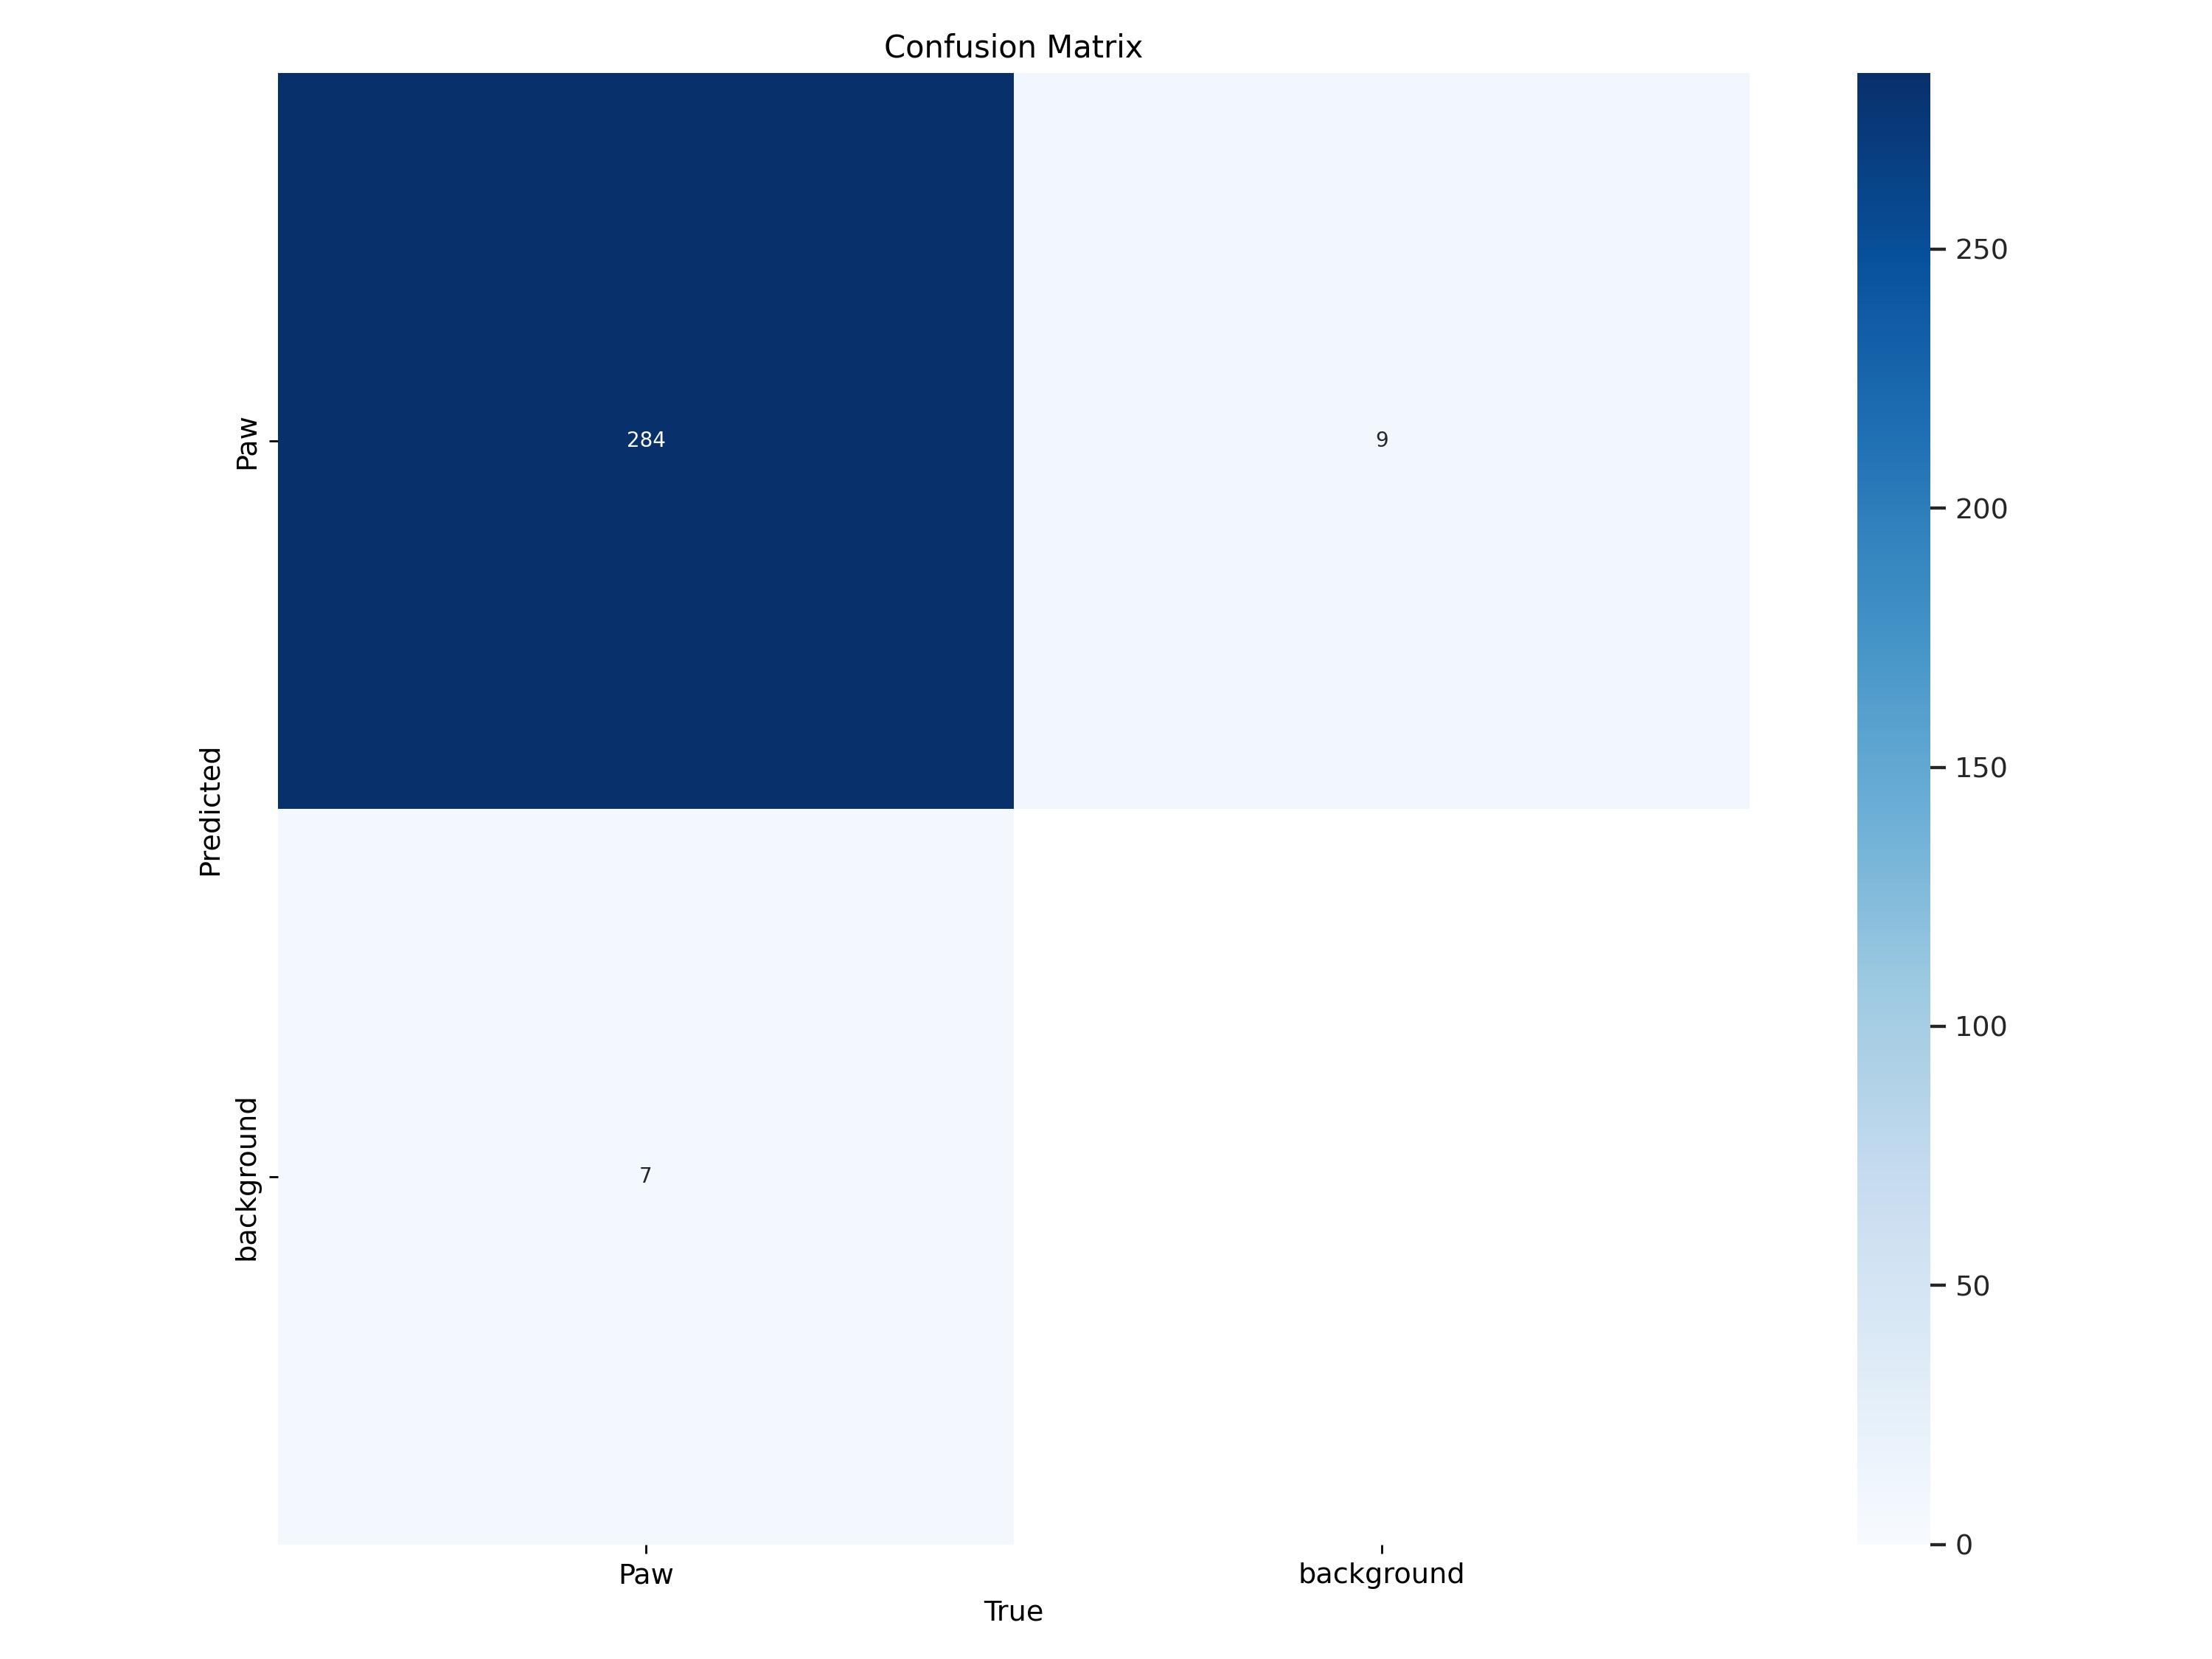

In [10]:
from IPython.display import Image
Image('/content/runs/detect/train/confusion_matrix.png', width=600)

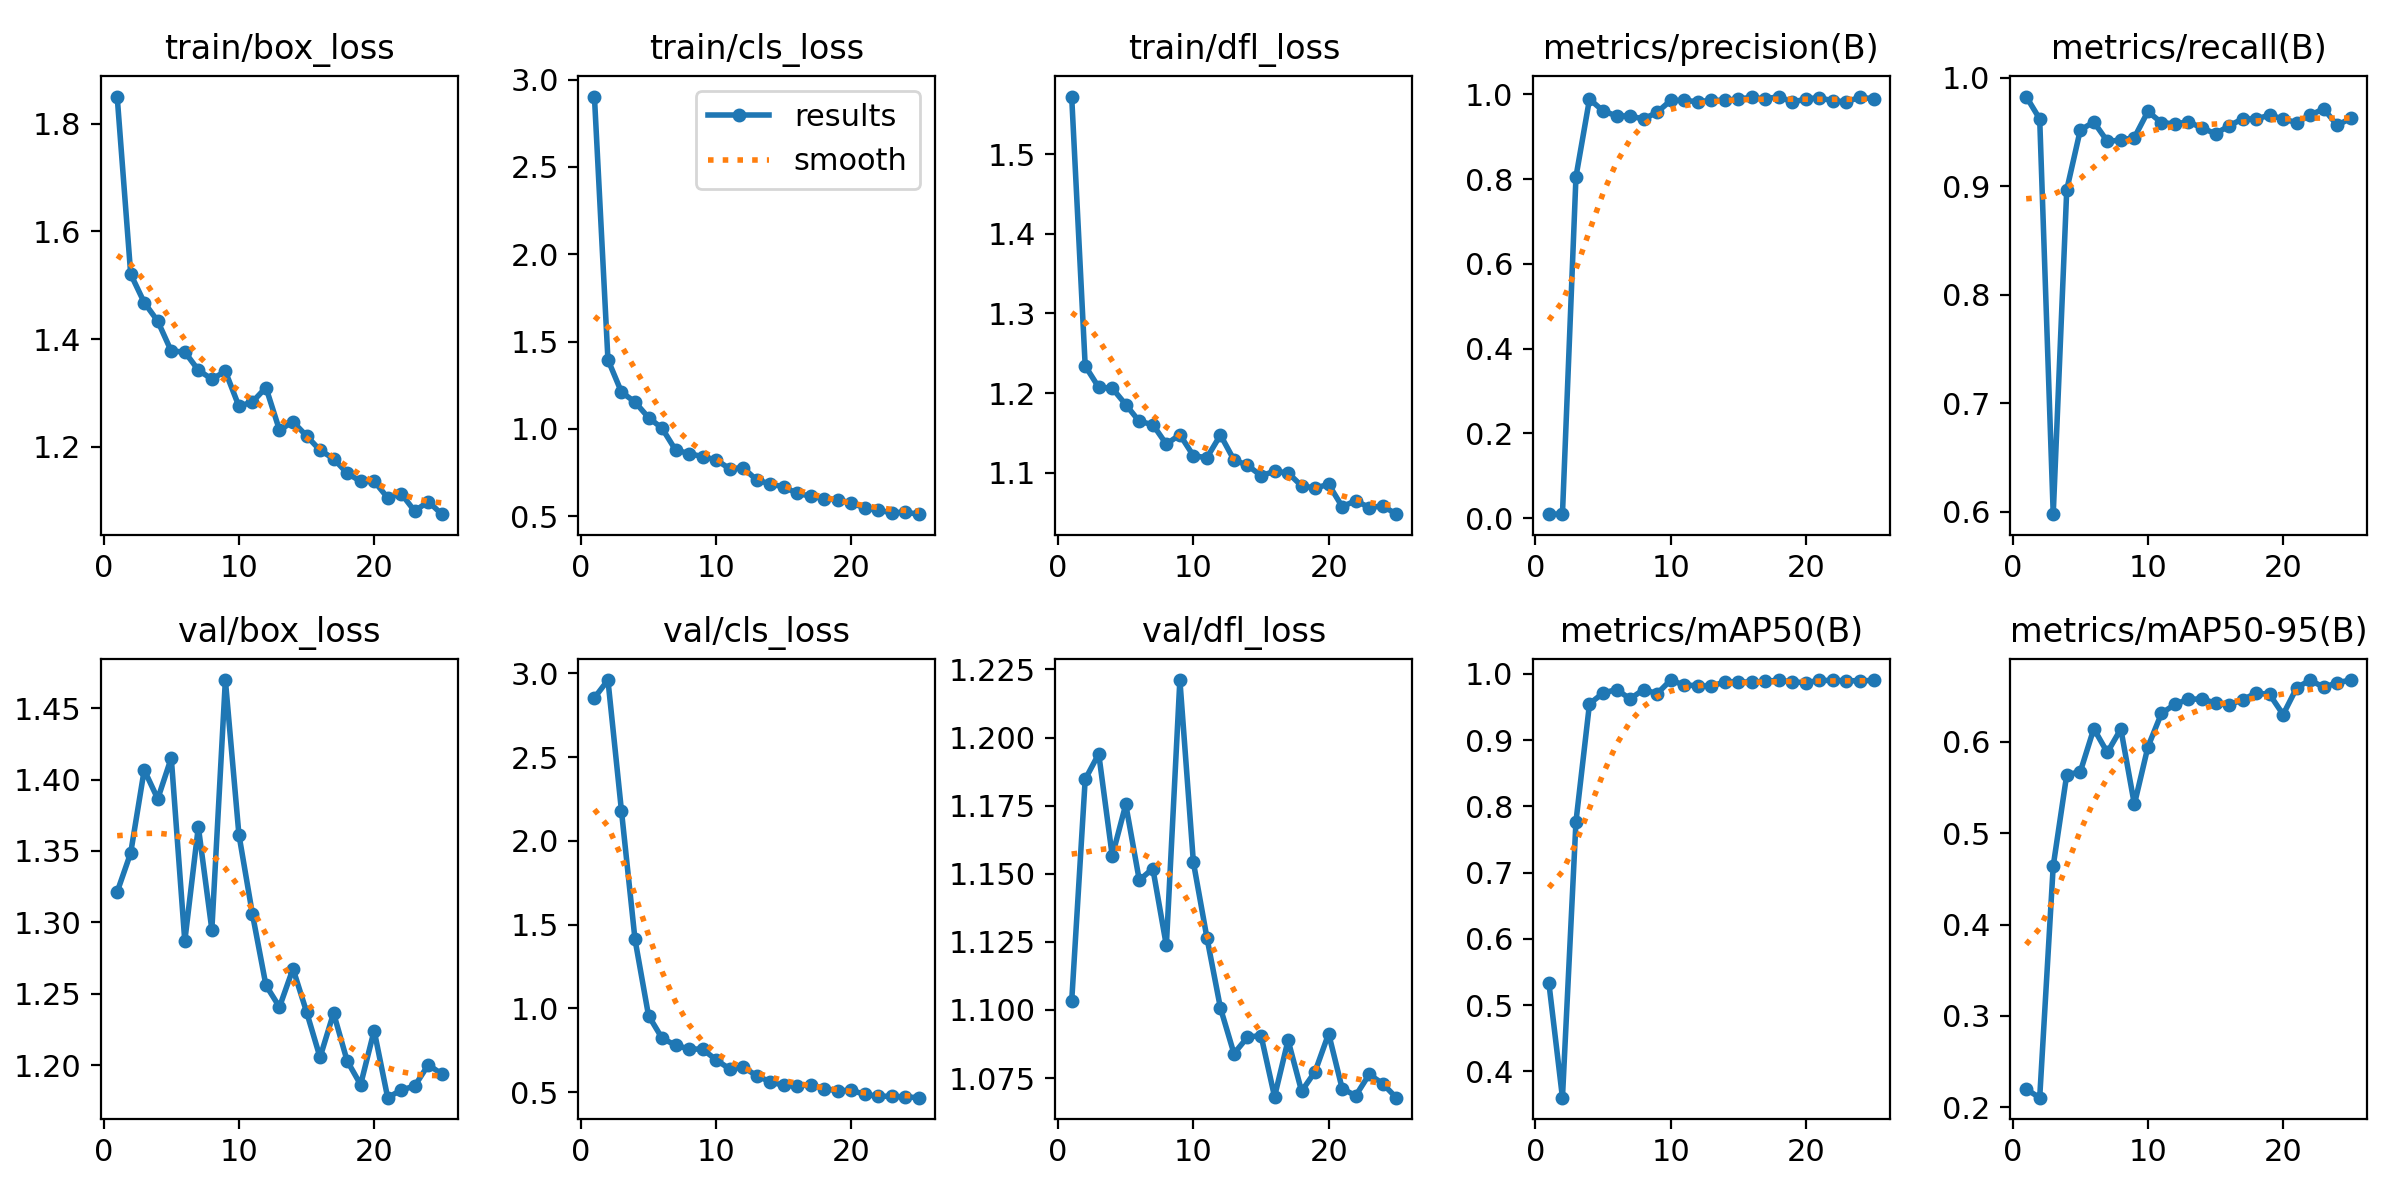

In [7]:
Image(filename="/content/runs/detect/train/results.png", width=500)

##Model Validation.

In [8]:
!yolo task=detect mode=val data=/content/Rat-Paw-Custom-Annotation-1/data.yaml model=/content/runs/detect/train/weights/best.pt


Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Rat-Paw-Custom-Annotation-1/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:02<00:00,  2.38it/s]
                   all        100        291      0.989      0.963      0.989      0.668
Speed: 3.0ms preprocess, 6.8ms inference, 0.0ms loss, 8.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


##Predcting Sample Image.

In [12]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/Rat-Paw-Custom-Annotation-1/test/images/_-102-_jpg.rf.23d7a3f313508e6451c8dde10f8801b2.jpg save=True

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/Rat-Paw-Custom-Annotation-1/test/images/_-102-_jpg.rf.23d7a3f313508e6451c8dde10f8801b2.jpg: 640x640 2 Paws, 9.4ms
Speed: 2.5ms preprocess, 9.4ms inference, 786.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


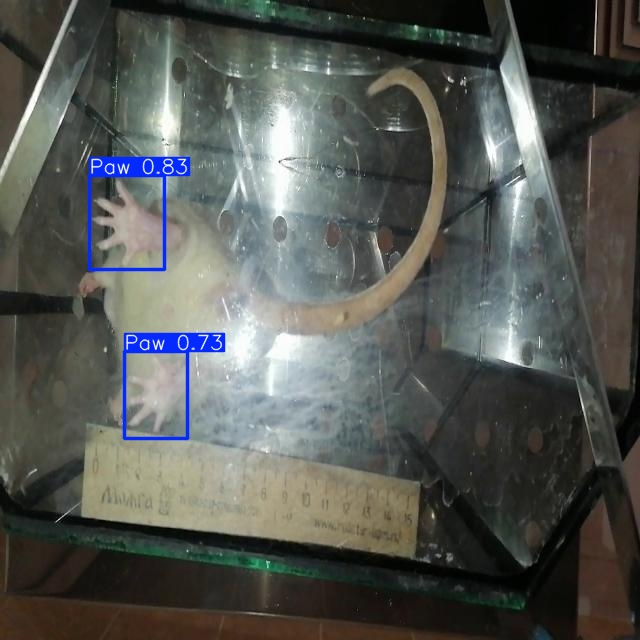

In [13]:
Image(filename="/content/runs/detect/predict/_-102-_jpg.rf.23d7a3f313508e6451c8dde10f8801b2.jpg", width=500)

#Exporting Model


In [14]:
!yolo export model=runs/detect/train/weights/best.pt format=onnx


Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 224.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 284.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 313.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 139.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 316.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.3s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take 

##Downloading the exported file

In [15]:
from google.colab import files

files.download("/content/runs/detect/train/weights/best.onnx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>